In [7]:
# load EEG data
import numpy as np
import scipy.io as sio
data_path = 'data/eeg/'
file_name = 'SubA_6chan_2LF.mat'
mat_contents = sio.loadmat(data_path+file_name)
eeg_data = mat_contents['EEGDATA']

In [8]:
import numpy as np
def unfold(X,n):
    ''' mode-n unfolding of tensor X
    Args: 
        X: input tensor
        n: targeted mode
    Returns:
        matricized version of X
    '''
    shape = np.shape(X)
    ndim = np.ndim(X)
    perm_order = np.roll(np.arange(ndim),n-1)
    X_n= np.reshape(np.transpose(X, perm_order), [shape[n-1],-1])
    return X_n

In [12]:
# print the content
%matplotlib inline
import matplotlib.pyplot as plt
X = eeg_data

X_1 = unfold(X,1)
U, s_1, V = np.linalg.svd(X_1, full_matrices=False)

X_2 = unfold(X,2)
U, s_2, V = np.linalg.svd(X_2, full_matrices=False)

X_3 = unfold(X,3)
U, s_3, V = np.linalg.svd(X_3, full_matrices=False)

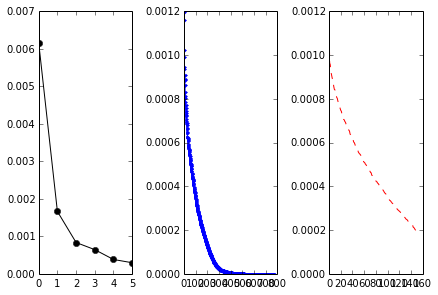

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplot(1, 3, 1)
plt.plot(s_1, 'ko-')


plt.subplot(1, 3, 2)
plt.plot(s_2, 'b.-')


plt.subplot(1, 3, 3)
plt.plot(s_3,'r--')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)